In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
X = df[['company','job','degree']]

In [4]:
Y = df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
X['company_n'] = le.fit_transform(X['company'])
X['job_n'] = le.fit_transform(X['job'])
X['degree_n'] = le.fit_transform(X['degree'])

In [9]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


<ol>
    <li>In Company_n  0:abc_pharma 1:facebook 2:google</li>
    <li>In Job_n 0:Business_manager 1:computer_programmer 2:sales_executive</li>
    <li>In degree_n 0:bachelors 1:masters</li>
</ol>

In [10]:
X.drop(['company','job','degree'],axis = 1, inplace = True)

In [11]:
X.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [14]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(x_test,y_test)

0.75

In [16]:
model.predict(x_test)

array([1, 0, 0, 1])

In [17]:
y_test

15    1
1     0
5     1
13    1
Name: salary_more_then_100k, dtype: int64

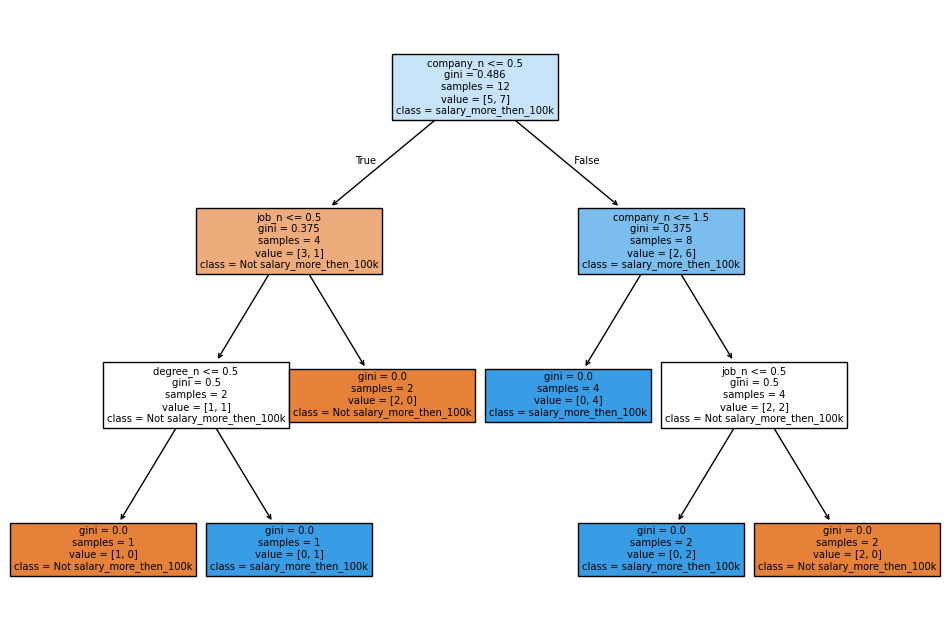

In [19]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Not salary_more_then_100k', 'salary_more_then_100k'], filled=True)
plt.show()